# Table of Contents
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Exporting data

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Enable matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 6 Advanced Analytics and Dashboard Design\Olist'

In [4]:
# Import Olist data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_merged.csv'), index_col=[0])

In [5]:
# Check orders dataset

df.head()

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,credit_card,1,18.12,8.0,2.0,6.0,7.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,3,voucher,1,2.00,8.0,2.0,6.0,7.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,2,voucher,1,18.59,8.0,2.0,6.0,7.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0,1,boleto,1,141.46,12.0,0.0,12.0,5.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0,1,credit_card,3,179.12,9.0,0.0,9.0,17.0


In [6]:
df.shape

(104477, 18)

## 2. Data cleaning

#### i) Missing values check

In [7]:
# Check for missing values

df.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     1898
order_delivered_customer_date    3154
order_estimated_delivery_date       0
review_score                      800
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
act_delivery_days                3168
seller_delivery_days             1912
carrier_delivery_days            3155
est_less_act_delivery_days       3154
dtype: int64

In [8]:
# Remove records with missing data since they are a small subset of the total orders

df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score'], inplace=True)

In [9]:
# Re-check for missing values

df.isnull().sum()

order_id                         0
customer_id                      0
customer_unique_id               0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
act_delivery_days                0
seller_delivery_days             0
carrier_delivery_days            0
est_less_act_delivery_days       0
dtype: int64

#### ii) Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(100632,)

#### iii) Extreme values checks

<Axes: xlabel='act_delivery_days', ylabel='Count'>

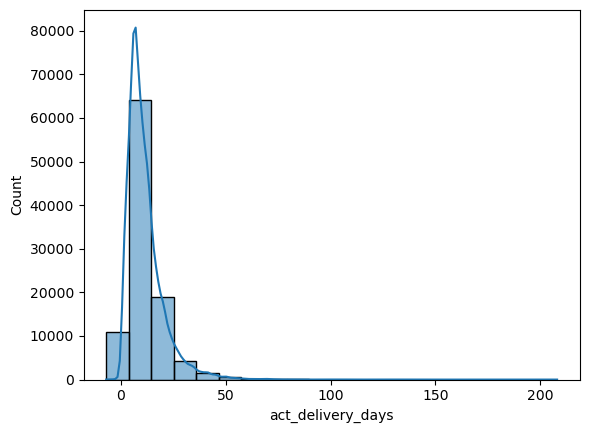

In [12]:
# Check act_delivery_days extreme values

sns.histplot(df['act_delivery_days'], bins=20, kde = True)

In [13]:
# Check records with extreme high values

df[df['act_delivery_days'] > 100] # Leave as these look like legitimate deliveries that took a long time to reach customer

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
1701,a4efaffc506a395c9cea7402b078c1e5,2020559b0ae9910898ef57a8159533ab,aa59e23a1fdb544008529f635be3f8cf,delivered,2018-01-17 10:50:09,2018-01-17 10:58:33,2018-01-24 12:30:54,2018-05-07 19:25:33,2018-02-23,1.0,1,credit_card,2,118.02,110.0,7.0,103.0,-74.0
3252,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,d6e35f5a7df8970f8cae8251516ab787,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,1.0,1,credit_card,5,56.97,102.0,101.0,1.0,-92.0
3379,4f39a94d6e474819d898d6df7d394996,27a410dccb395b6ce45963874d158352,b0cd6a169aaf7502ca3783e5e7527921,delivered,2017-04-28 16:28:03,2017-04-29 02:42:51,2017-05-09 14:06:48,2017-09-19 13:54:18,2017-05-30,2.0,1,boleto,1,196.50,143.0,10.0,132.0,-113.0
4881,b31c7dea63bb08f8cdd1ec32514ccf0b,2a351c540a0cbdd0d9c266626f6d3acc,8a9b30182d557a7b44a8543c9f2fe931,delivered,2017-09-26 18:35:35,2017-09-26 18:49:09,2017-09-29 16:23:06,2018-02-05 21:25:43,2017-10-19,1.0,1,credit_card,6,72.28,132.0,2.0,129.0,-110.0
10917,3602a80b09d914236f74c733631f3b8b,367000b9bd508db790e048df2f6d6af9,4261e564d3e674b5234f01d199701475,delivered,2018-01-31 20:38:38,2018-02-02 08:55:51,2018-02-02 18:48:35,2018-05-18 11:06:52,2018-03-19,1.0,1,credit_card,1,133.03,105.0,0.0,104.0,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90894,ed8e9faf1b75f43ee027103957135663,14fcb7be0e0a5868f190e1cda895d6fa,68d8be0d89636fb2e46c9cabae4360e1,delivered,2017-11-29 15:10:14,2017-12-01 11:31:53,2017-12-04 19:48:46,2018-05-21 18:22:18,2017-12-19,4.0,1,boleto,1,85.82,171.0,3.0,167.0,-154.0
93608,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,1.0,1,credit_card,10,457.65,194.0,0.0,194.0,-167.0
96868,29c3b79aace1b72a82b1232bf494e16f,9225e82d7b09bfc606f1849de9300050,6411c4f3a3a713893b2a54533129da94,delivered,2017-12-16 10:04:35,2017-12-16 10:15:25,2018-01-15 17:51:55,2018-04-28 15:51:50,2018-01-24,2.0,1,credit_card,10,600.43,133.0,30.0,102.0,-95.0
99925,17cc6728043d53cc948551dfbf0a338b,dcfb92c7e6d519560090aeb5bfa03f0c,cf3acd6a8c138a12143363ae5a613f2e,delivered,2017-11-25 12:14:38,2017-11-25 12:33:04,2017-11-28 18:19:49,2018-04-16 23:26:51,2017-12-27,1.0,1,credit_card,7,71.15,142.0,3.0,139.0,-111.0


In [14]:
df['act_delivery_days'].mean() # Check the mean

11.623042372207648

In [15]:
df['act_delivery_days'].median() # Check the median

9.0

In [16]:
df['act_delivery_days'].max() # Check the max

208.0

## 3. Data prep for regression analysis

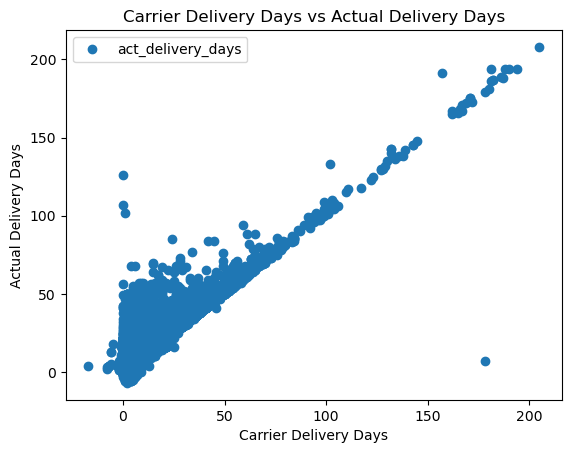

In [17]:
# Create a scatterplot using matplotlib for another look at how actual delivery days and carrier delivery days plot against each other.
df.plot(x = 'carrier_delivery_days', y = 'act_delivery_days', style = 'o')
plt.title('Carrier Delivery Days vs Actual Delivery Days')  
plt.xlabel('Carrier Delivery Days')  
plt.ylabel('Actual Delivery Days')  
plt.show()

#### There appears to be a close relationship between these two variables that I'd like to explore further. However, the scatterplot shows an obvious outlier that defies logic - carrier delivery days must be less than actual (aka total) delivery days since the latter should be at or close to seller delivery days plus carrier delivery days. Likely a data error as it isn't possible for an order to be delivered within a few days if it took the carrier nearly 200 days to ship the product from when the seller made it available. I will remove this outlier.

In [18]:
# Exclude records where orders are delivered on dates before the seller has made them available for shipping (not possible)

df = df[df['carrier_delivery_days'] <= df['act_delivery_days']]

In [19]:
# Check output

df.shape # 771 orders removed

(99861, 18)

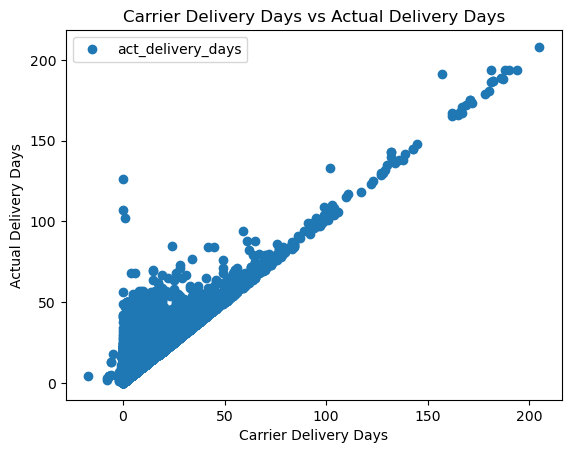

In [20]:
# Re-run scatterplot

df.plot(x = 'carrier_delivery_days', y = 'act_delivery_days', style = 'o')
plt.title('Carrier Delivery Days vs Actual Delivery Days')  
plt.xlabel('Carrier Delivery Days')  
plt.ylabel('Actual Delivery Days')  
plt.show()

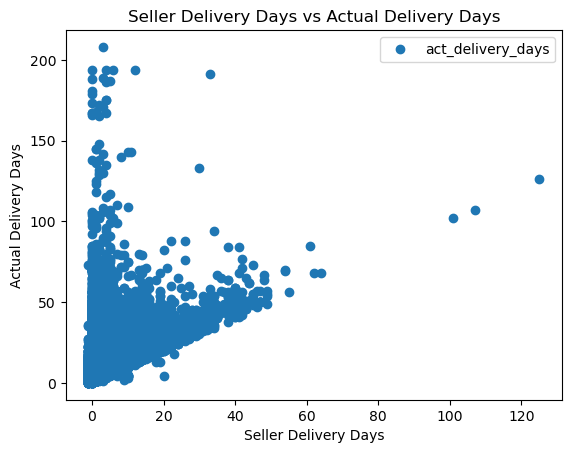

In [21]:
# Create a scatterplot using matplotlib for another look at how actual delivery days and carrier delivery days plot against each other.

df.plot(x = 'seller_delivery_days', y = 'act_delivery_days', style = 'o')
plt.title('Seller Delivery Days vs Actual Delivery Days')  
plt.xlabel('Seller Delivery Days')  
plt.ylabel('Actual Delivery Days')  
plt.show()

#### The scatterplot does not appear to be a close relationship between these two variables, therefore further analysis will focus on the relationship between carrier delivery days and actual/total delivery days.

#### Hypothesis: Regardless of seller actions, actual delivery times to customers on Olist orders are dependent on carrier delivery performance.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['carrier_delivery_days'].values.reshape(-1,1)
y = df['act_delivery_days'].values.reshape(-1,1)

In [23]:
X

array([[ 6.],
       [ 6.],
       [ 6.],
       ...,
       [23.],
       [13.],
       [ 6.]])

In [24]:
y

array([[ 8.],
       [ 8.],
       [ 8.],
       ...,
       [24.],
       [17.],
       [ 7.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

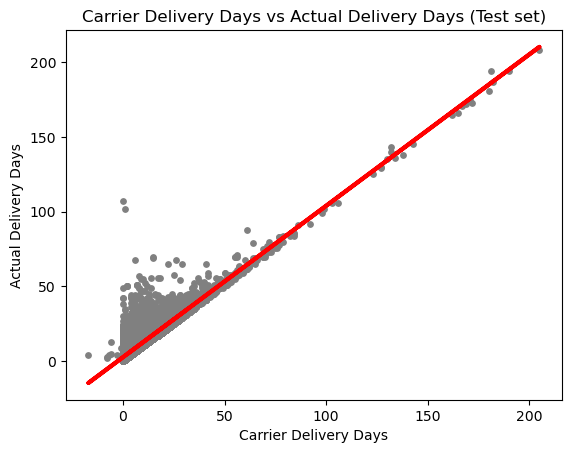

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Carrier Delivery Days vs Actual Delivery Days (Test set)')
plot_test.xlabel('Carrier Delivery Days')
plot_test.ylabel('Actual Delivery Days')
plot_test.show()

#### Key observations: 
   1. The regression line appears to be a good fit to the data set, with few data points a long way from the regression line. This suggests that carrier delivery times alone have a very strong influence on total delivery times, consistent with the hypothesis. 
   2. There is a cluster of data points where total delivery days is higher than the model prediction, indicating that other factors are also influencing the overall peformance. 
   3. However, if the overwhelming driver of overall delivery times is the carrier performance, this would help the business focus on actions to improve this independent variable to shorten total delivery times to customers, which is likely to result in higher customer satisfaction and repeat sales.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [31]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.01252346]]
Mean squared error:  12.928509640834847
R2 score:  0.8624866578270636


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.0,5.730241
1,9.0,10.792858
2,17.0,16.867999
3,20.0,20.918093
4,11.0,8.767811
5,10.0,12.817905
6,16.0,4.717718
7,12.0,13.830429
8,25.0,25.980710
9,4.0,6.742765


#### Key observations:
   1. As expected after reviewing the initial scatterplot, the model performed well at using carrier delivery times to predict total delivery times on Olist orders.
   2. The slope indicates almost a 1:1 relationship between carrier delivery days and predicted total delivery days.
   3. The MSE of close to 13 days is relatively small but still reflects some modest variability in how close the regression line passes through the observations.
   4. The R2 score of 0.86 indicates that the model explains 86% of the variance in the data, which is a pretty high score. It suggests that carrier delivery performance has a strong influence in explaining total delivery performance. 
   5. The comparison of actual and predicted values is another way of showing how the model does a pretty good job with its estimates. From this sample, most of the predictions are within a day or two of the actual result. However, there are a few examples where the model doesn't do a good job and the difference is large (20 vs. 8 days, 27 vs. 16 days).
   6. While a multiple regression model that takes into account other variables like seller actions could result in a better predictive model, the purpose of this analysis was to show that carrier delivery times are by themselves a very important determinant of total delivery times, and Olist could benefit just from focusing on taking actions to improve this metric to improve overall order delivery performance to customers. 
   7. My assessment is that there is low potential bias risk with the model. It does not rely on human decisions and the data set is very large with nearly 100k records. Outliers were not removed from the data set, only records that couldn't be accurate as they were illogical (e.g. carrier delivery time can't be greater than total delivery time).

## 5. Exporting data

In [33]:
# Export cleaned dataframe

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_merged_cleaned.csv'))